In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fdeec17.csv')

In [3]:
df 

,Unnamed: 0,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,0,2017,1,1,1,2,50,50,2,1,...,30.0,52.0,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,1,2017,1,1,1,2,15,15,2,2,...,42.0,52.0,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2,2017,1,1,1,2,15,15,2,2,...,31.0,52.0,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,3,2017,3,1,1,2,50,50,2,1,...,30.0,52.0,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,4,2017,3,1,1,2,15,15,2,2,...,42.0,52.0,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428637,428637,2017,2,1,2,3,50,50,1,2,...,71.0,75.0,234080,27.451625,0.0,NaN,NaN,NaN,NaN,NaN
428638,428638,2017,3,1,2,3,50,60,1,2,...,33.0,75.0,234081,24.287870,NaN,NaN,NaN,NaN,NaN,NaN
428639,428639,2017,3,1,2,3,50,50,1,2,...,71.0,75.0,234081,24.287870,NaN,NaN,NaN,NaN,NaN,NaN
428640,428640,2017,4,1,2,3,50,60,1,2,...,33.0,75.0,234082,19.596248,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['ACTEU'] = df['ACTEU'].apply(lambda x : 'Actif_Occupé' if x == 1
                                                      else 'Chômeur' if x == 2
                                                      else 'Inactif' if x == 3
                                                      else 'NAN' )

In [5]:
count = df['ACTEU'].value_counts()

In [6]:
count

Inactif         207520
Actif_Occupé    198054
Chômeur          21864
NAN               1204
Name: ACTEU, dtype: int64

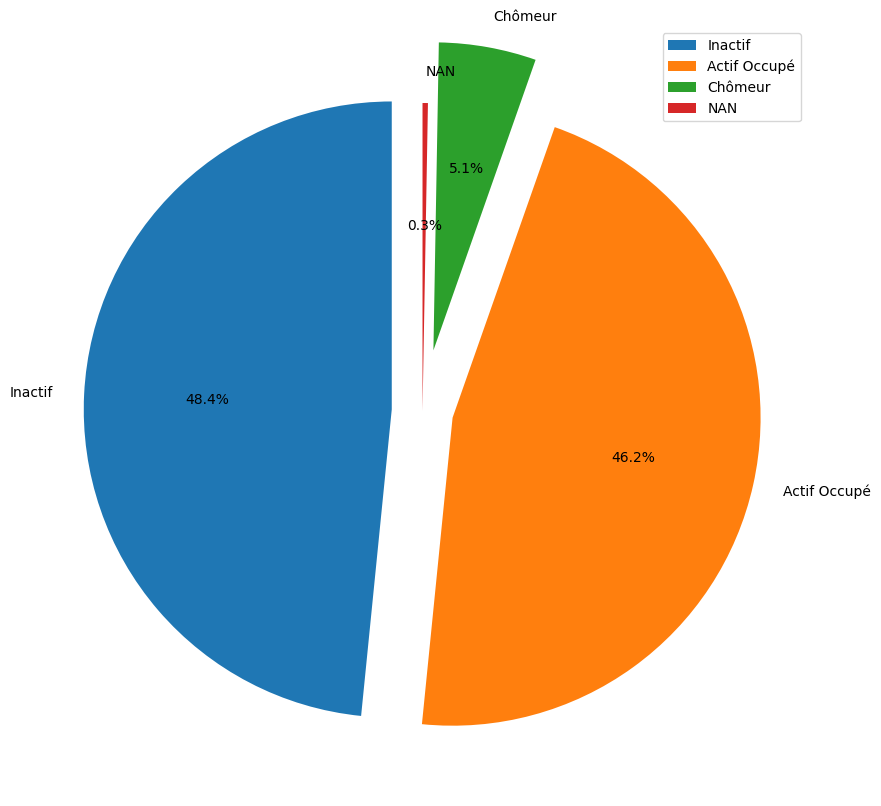

In [7]:
labels =  ['Inactif', 'Actif Occupé', "Chômeur", 'NAN']
myexplode = [0.1, 0.1, 0.2, 0]
plt.figure(figsize=(10,10))
plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=90, explode=myexplode)
plt.legend()
plt.show()


In [8]:
df["ACTEU6"]

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
428637    6.0
428638    6.0
428639    6.0
428640    6.0
428641    6.0
Name: ACTEU6, Length: 428642, dtype: float64

In [9]:
df['ACTEU6'] = df['ACTEU6'].apply(lambda x : 'Actif_Occupé' if x == 1
                                                      else 'Autres_inactifs' if x == 6
                                                      else 'Etudiant, élève, stagiaire en formation' if x == 5
                                                      else 'Chômeur_PSERE' if x == 3
                                                      else "Autre Chômeur BIT" if x == 4
                                                      else "NAN" )

In [10]:
count2 = df['ACTEU6'].value_counts()

In [11]:
count2

Actif_Occupé                               198054
Autres_inactifs                            172921
Etudiant, élève, stagiaire en formation     34599
Chômeur_PSERE                               20854
NAN                                          1204
Autre Chômeur BIT                            1010
Name: ACTEU6, dtype: int64

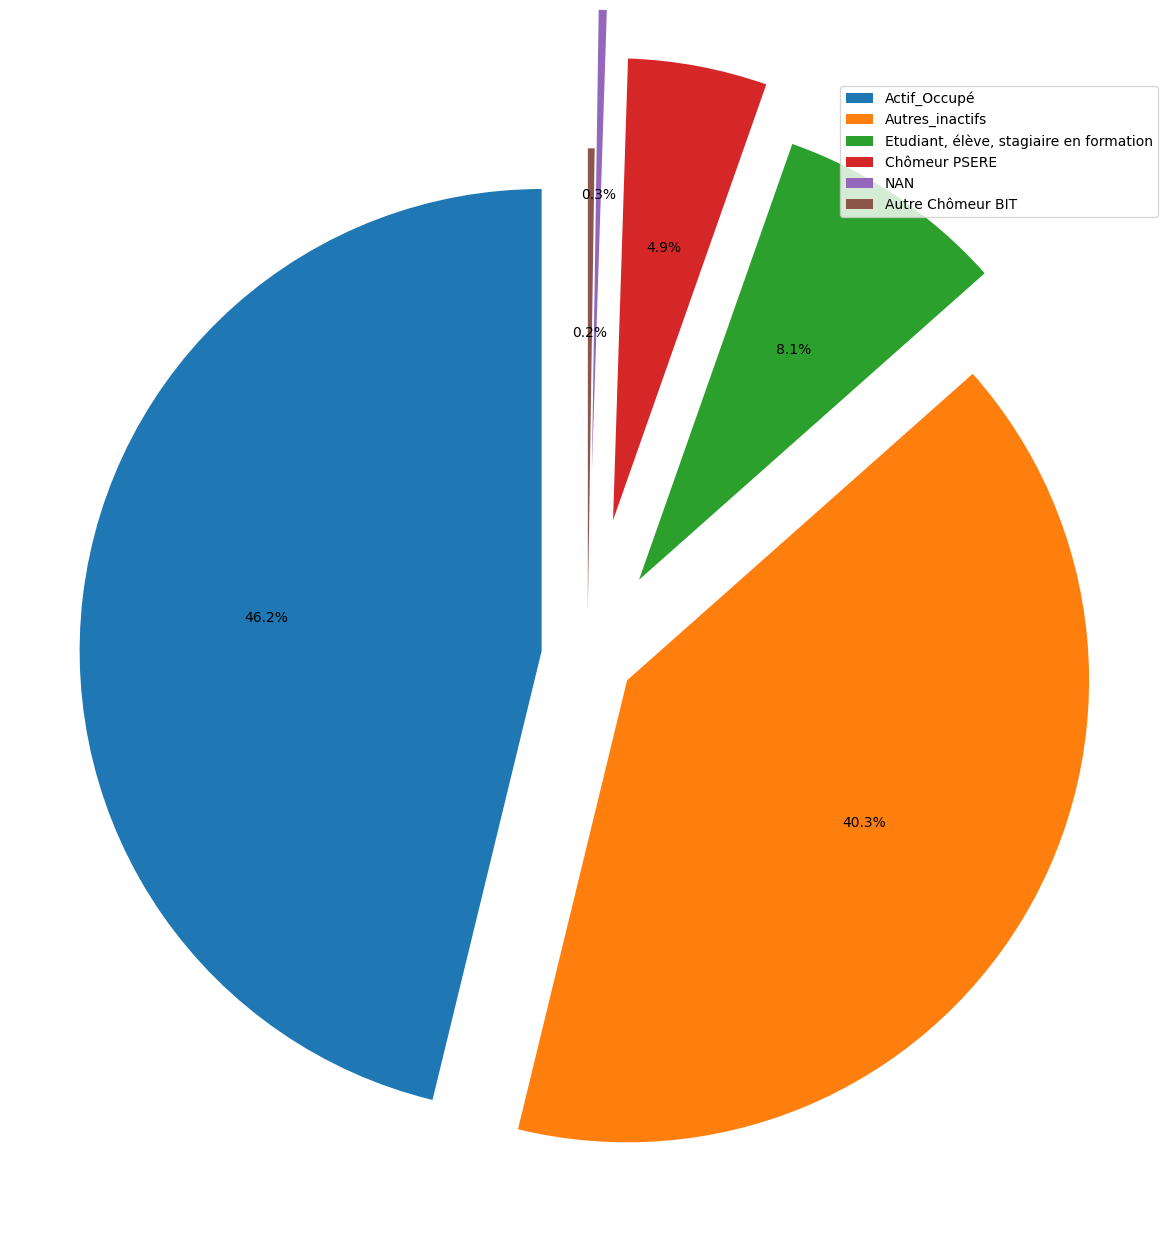

In [12]:
labels2 =  ['Actif_Occupé', 'Autres_inactifs', "Etudiant, élève, stagiaire en formation", 'Chômeur PSERE', "NAN", "Autre Chômeur BIT "]
plt.figure(figsize=(15,15))
myexplode2 = [0.1, 0.1, 0.2, 0.3, 0.4, 0.1]
plt.pie(count2,  autopct='%1.1f%%', startangle=90, explode=myexplode2)
plt.legend(labels2)
plt.show()

In [13]:
data = df.loc[(df["ACTEU6"] == "Chômeur_PSERE" ) | (df["ACTEU6"] == "Actif_Occupé")]

In [14]:
val =  data["ACTEU6"].value_counts(normalize=True)

In [15]:
val

Actif_Occupé     0.904736
Chômeur_PSERE    0.095264
Name: ACTEU6, dtype: float64

In [16]:
data2 = df.loc[(df["ACTEU6"] == "Chômeur_PSERE" ) | (df["ACTEU6"] == "Actif_Occupé") | (df["ACTEU6"] == "Autres_inactifs")]

In [17]:
val2 = data2["ACTEU6"].value_counts(normalize=True)

In [18]:
val2

Actif_Occupé       0.505460
Autres_inactifs    0.441318
Chômeur_PSERE      0.053222
Name: ACTEU6, dtype: float64

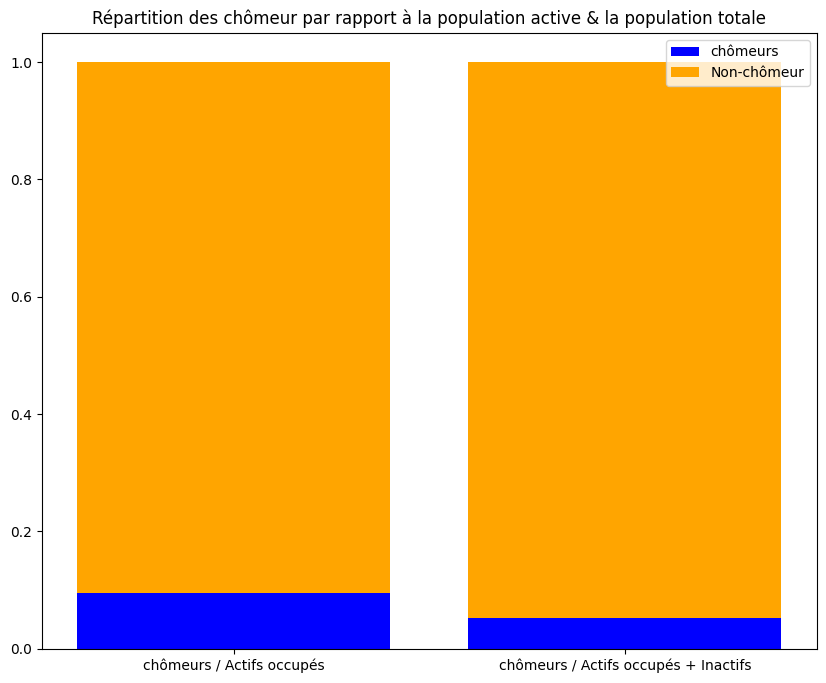

In [165]:
names = ["chômeurs / Actifs occupés" , "chômeurs / Actifs occupés + Inactifs"]
mixte = val2.Actif_Occupé + val2.Autres_inactifs
value_1 = [val.Chômeur_PSERE, val2.Chômeur_PSERE]
value_2 = [val.Actif_Occupé, mixte]
fig = plt.figure(figsize=(10,8))
plt.title("Répartition des chômeur par rapport à la population active & la population totale")
plt.bar(names, value_1,  color="blue")
plt.bar(names, value_2, bottom=value_1, color="orange")
plt.legend(["chômeurs", "Non-chômeur"])
plt.show()

In [20]:
df["ANCCHOM"].value_counts()


8.0    3906
4.0    3648
5.0    3398
2.0    3270
3.0    3193
7.0    2289
6.0    1132
1.0     902
Name: ANCCHOM, dtype: int64

In [21]:
df['ANCCHOM'] = df['ANCCHOM'].apply(lambda x : '3 ans ou plus' if x == 8.0
                                                      else "De 6 mois à moins d'un an" if x == 4.0
                                                      else "De 1 an à moins d'un an et demi" if x == 5.0
                                                      else "De 1 mois à moins de 3 mois" if x == 2.0
                                                      else "De 3 mois à moins de 6 mois" if x == 3.0
                                                      else "De 2 ans à moins de 3 ans" if x == 7.0
                                                      else "De 1 an et demi à moins de 2 ans" if x == 6.0
                                                      else "Moins d'un mois" if x == 1.0
                                                      else "NAN" )

In [22]:
supp_na = df[df["ANCCHOM"] == "NAN"].index

In [23]:
new_df = df.drop(supp_na)

In [24]:
a = new_df["ANCCHOM"].value_counts()

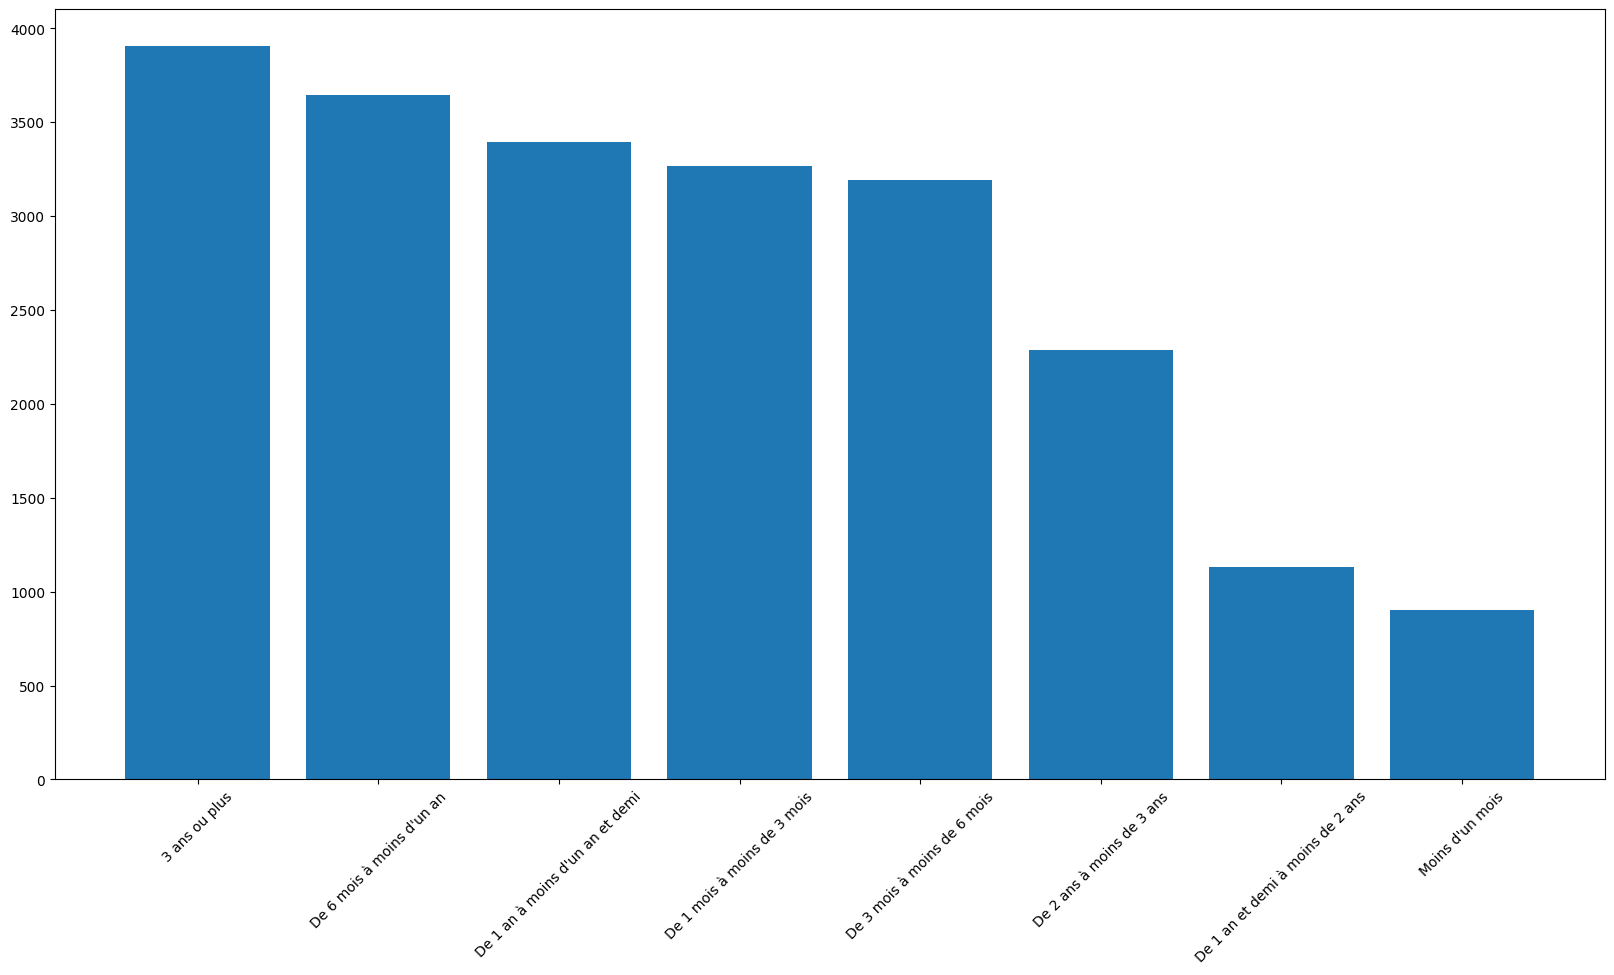

In [157]:
names2 = ["3 ans ou plus", "De 6 mois à moins d'un an", "De 1 an à moins d'un an et demi","De 1 mois à moins de 3 mois","De 3 mois à moins de 6 mois","De 2 ans à moins de 3 ans","De 1 an et demi à moins de 2 ans","Moins d'un mois"]
plt.figure(figsize=(20,10))
x_pos = np.arange(len(names2))
plt.xticks(x_pos, names2, rotation=45)
plt.bar(names2, a)
plt.show()

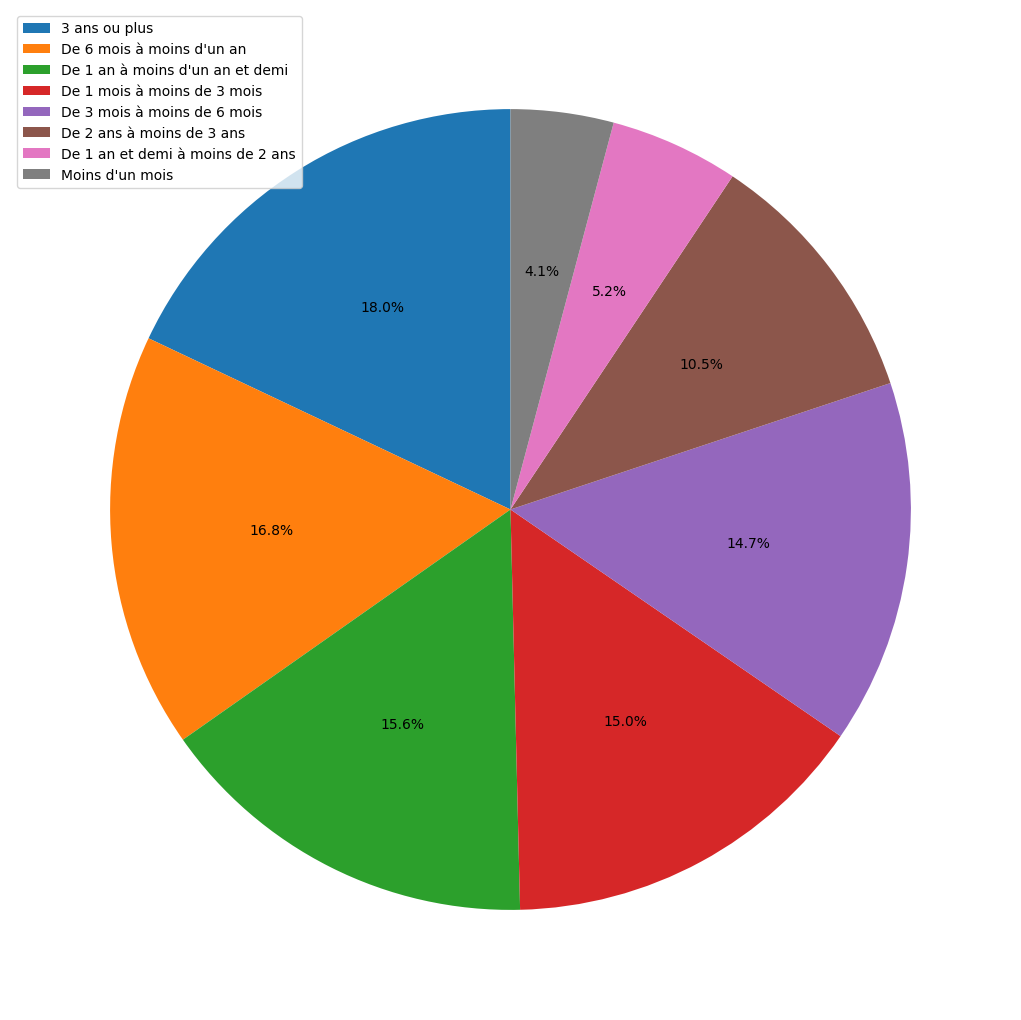

In [26]:
plt.figure(figsize=(13,13))
plt.pie(a,  autopct='%1.1f%%', startangle=90)
plt.legend(names2)
plt.show()

In [27]:
boul = df

In [28]:
boul["CONTACT"].dropna(inplace=True)

In [29]:
b = boul["CONTACT"].value_counts()

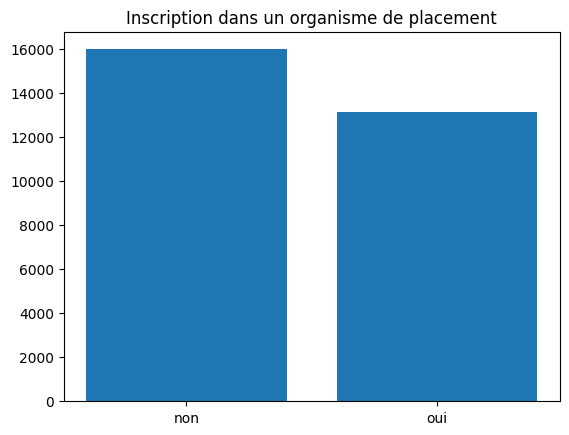

In [154]:
names3 = ["non", "oui"]
plt.bar(names3, b)
plt.title('Inscription dans un organisme de placement')
plt.show()

In [31]:
df["CREACCP"].dropna(inplace=True)

In [32]:
supp = df[df["CREACCP"] == 13.0].index

In [33]:
df.drop(supp, inplace=True)

In [37]:
c = df["CREACCP"].value_counts(normalize=True)

In [38]:
c

7.0     0.312111
2.0     0.128023
3.0     0.113420
6.0     0.083844
1.0     0.072880
4.0     0.064680
11.0    0.064127
12.0    0.056341
5.0     0.050767
8.0     0.027549
10.0    0.016308
9.0     0.009951
Name: CREACCP, dtype: float64

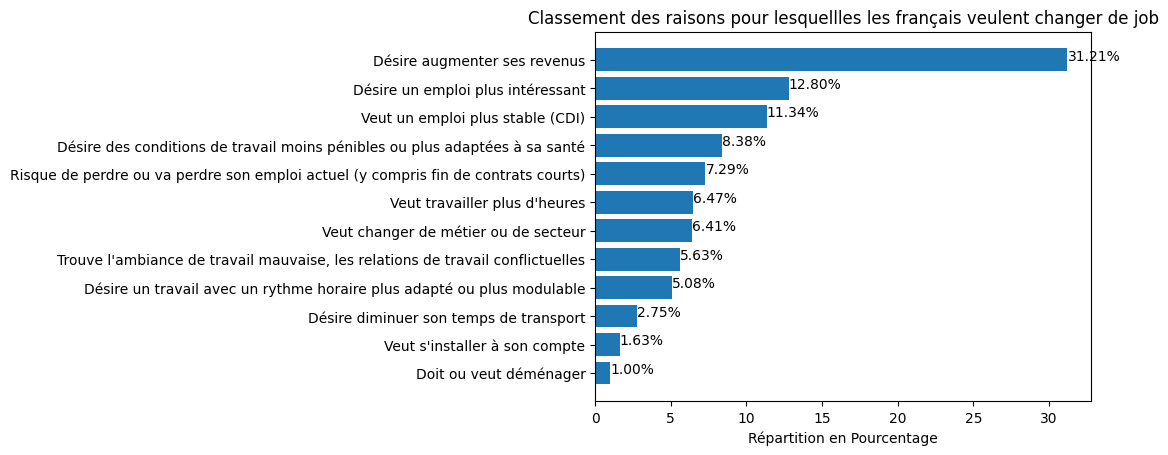

In [153]:
names4 = ["Désire augmenter ses revenus", "Désire un emploi plus intéressant", "Veut un emploi plus stable (CDI)", "Désire des conditions de travail moins pénibles ou plus adaptées à sa santé", "Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)", "Veut travailler plus d'heures", "Veut changer de métier ou de secteur", "Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles", "Désire un travail avec un rythme horaire plus adapté ou plus modulable", "Désire diminuer son temps de transport", "Veut s'installer à son compte", "Doit ou veut déménager"]
plt.barh(names4, c * 100)
plt.xlabel('Répartition en Pourcentage')
ax = plt.gca()
ax.invert_yaxis()
plt.axis()
plt.title('Classement des raisons pour lesquellles les français veulent changer de job')
for index, value in enumerate(c * 100):
    plt.text(value, index,
             str(f"{value :0.2f}%"))
plt.show()

In [86]:
df["HREC"].std()

8.502042347531248

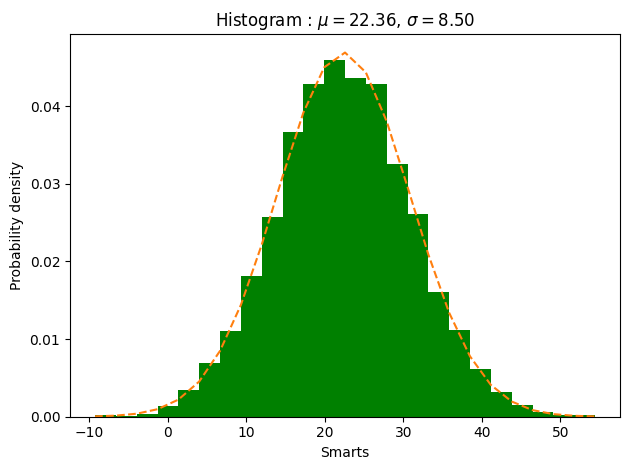

In [145]:
mu = df["HREC"].mean()
sigma = df["HREC"].std()
x = mu + sigma * np.random.randn(10000)

num_bins = 24

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, facecolor='g', density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(rf'Histogram : $\mu={mu:0.2f}$, $\sigma={sigma:0.2f}$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()